In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
df = pd.read_csv('Optimize_the_power_consumption_of_zone_1.csv')
df

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...,...
52578,52579,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


In [44]:
df = df.rename(columns={'S no':'S_no', 'Wind Speed':'Wind_Speed', 'general diffuse flows' : 'general_diffuse_flows', 'diffuse flows':'diffuse_flows','Air Quality Index (PM)':'Air_Quality_Index_(PM)', ' Power Consumption in A Zone':'Power_Consumption_in_A_Zone'})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S_no                         52583 non-null  int64  
 1   Temperature                  52263 non-null  object 
 2   Humidity                     52558 non-null  object 
 3   Wind_Speed                   52512 non-null  object 
 4   general_diffuse_flows        52275 non-null  float64
 5   diffuse_flows                52568 non-null  float64
 6   Air_Quality_Index_(PM)       52565 non-null  float64
 7   Cloudiness                   52583 non-null  int64  
 8   Power_Consumption_in_A_Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [46]:
#The Cloudiness column has no unique values (only 0), meaning it does not provide any useful information or contribute to the analysis. Hence, it is removed from the dataset.
df = df.drop(columns=['Cloudiness'])

In [47]:
# Check for duplicate records
print("\nDuplicate Records:", df.duplicated().sum())


Duplicate Records: 0


In [48]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
S_no                             0
Temperature                    320
Humidity                        25
Wind_Speed                      71
general_diffuse_flows          308
diffuse_flows                   15
Air_Quality_Index_(PM)          18
Power_Consumption_in_A_Zone      0
dtype: int64


In [49]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               S_no  general_diffuse_flows  diffuse_flows  \
count  52583.000000           52275.000000   52568.000000   
mean   26292.000000             182.964247      74.872330   
std    15179.548939             264.571351     124.084858   
min        1.000000               0.004000       0.011000   
25%    13146.500000               0.062000       0.122000   
50%    26292.000000               5.226000       4.412000   
75%    39437.500000             320.100000     100.500000   
max    52583.000000            1163.000000     936.000000   

       Air_Quality_Index_(PM)  Power_Consumption_in_A_Zone  
count            52565.000000                 52583.000000  
mean               154.499191                 31061.821779  
std                  2.871553                  8021.057455  
min                150.000000                  9457.750760  
25%                152.000000                 24738.858990  
50%                155.000000                 31189.787230  
75

In [50]:
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df['Wind_Speed'] = pd.to_numeric(df['Wind_Speed'], errors='coerce')

In [51]:
num_cols = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows']  # Add all numerical columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

Temperature: 142 outliers
Humidity: 294 outliers
Wind_Speed: 0 outliers
general_diffuse_flows: 2266 outliers
diffuse_flows: 4614 outliers


In [52]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [53]:
df.shape

(44689, 8)

In [54]:
df.dtypes

S_no                             int64
Temperature                    float64
Humidity                       float64
Wind_Speed                     float64
general_diffuse_flows          float64
diffuse_flows                  float64
Air_Quality_Index_(PM)         float64
Power_Consumption_in_A_Zone    float64
dtype: object

In [21]:
df.isnull().sum()

S_no                           0
Temperature                    0
Humidity                       0
Wind_Speed                     0
general_diffuse_flows          0
diffuse_flows                  0
Air_Quality_Index_(PM)         0
Power_Consumption_in_A_Zone    0
dtype: int64

In [22]:
# Set plot style
sns.set_style("whitegrid")

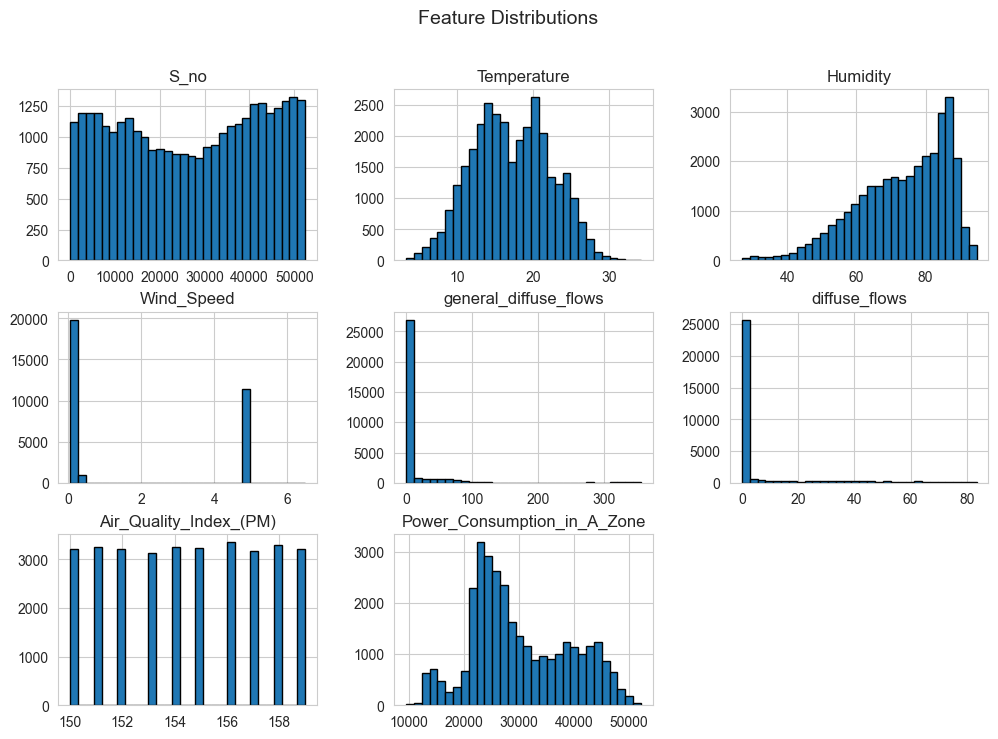

In [23]:
# Histogram of numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

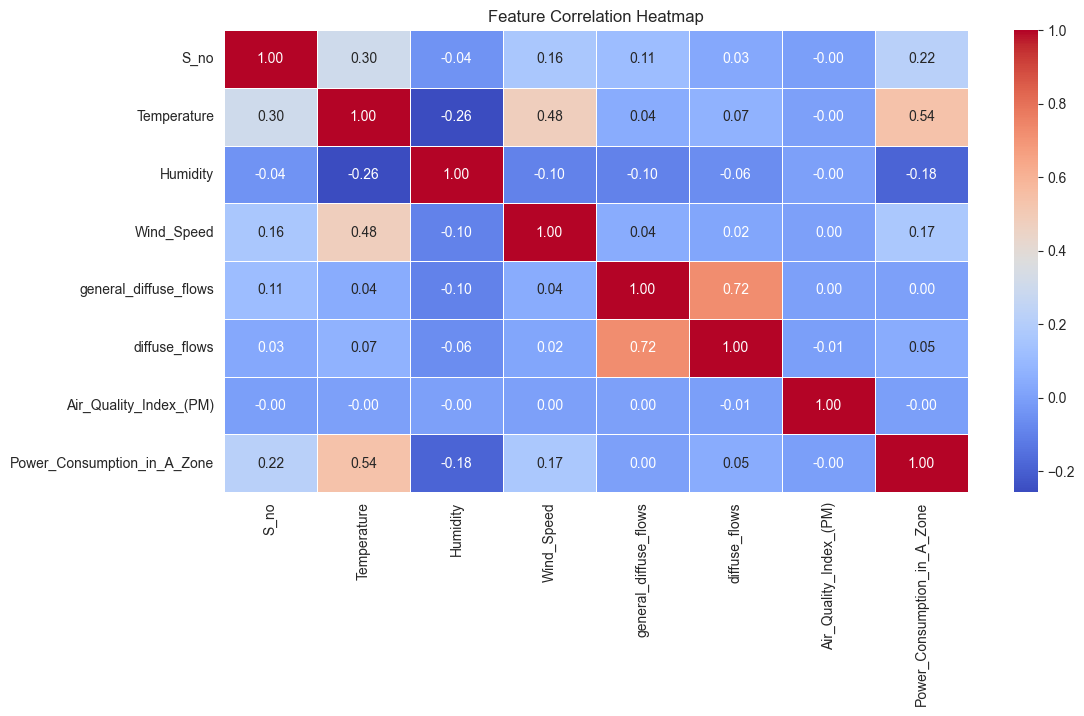

In [24]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

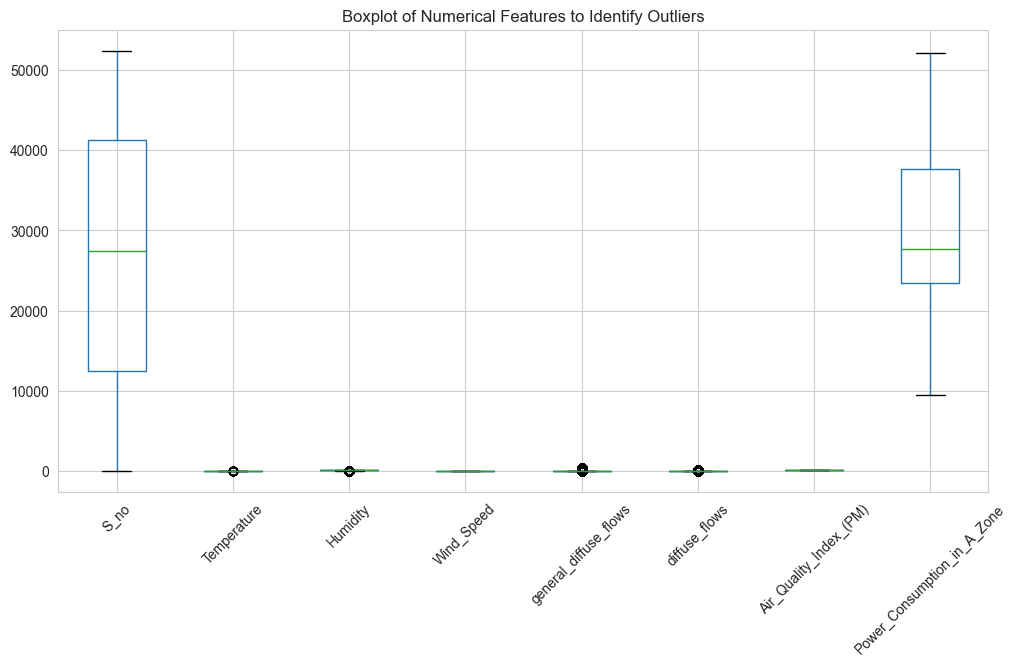

In [25]:
# Box plots for outliers in key numerical features
numerical_features = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 6))
df[numerical_features].boxplot(rot=45)
plt.title("Boxplot of Numerical Features to Identify Outliers")
plt.show()

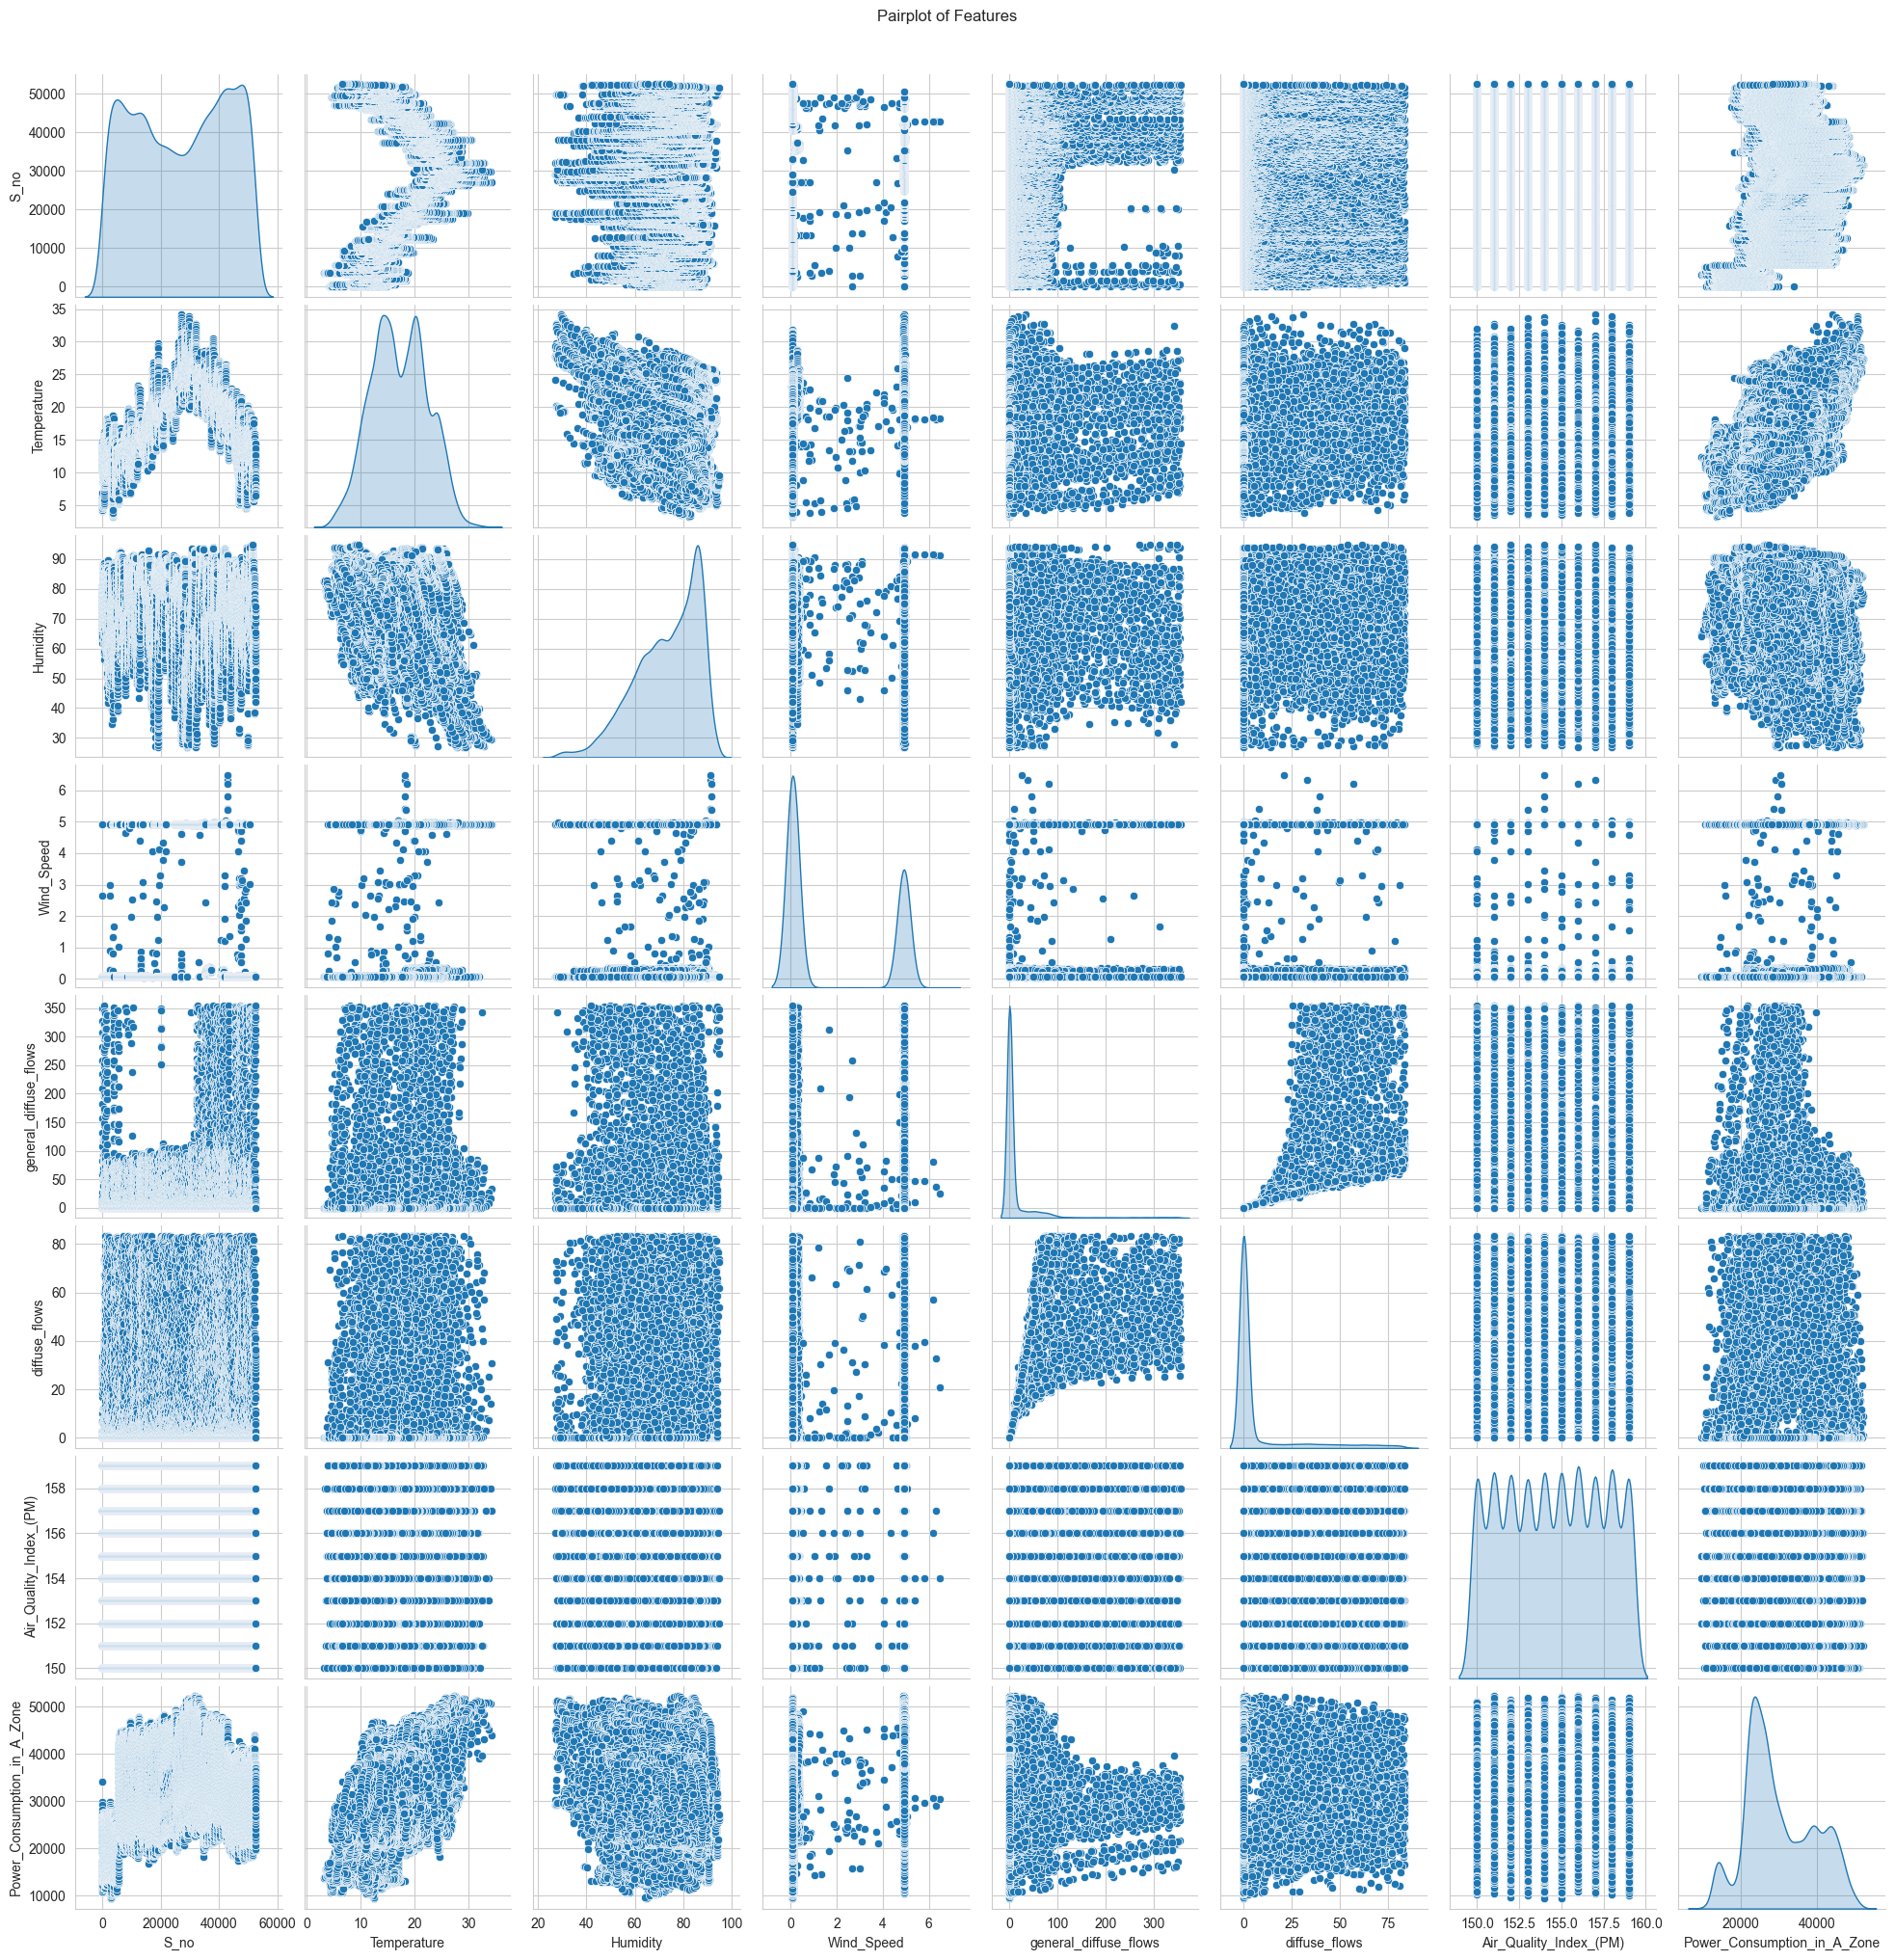

In [26]:
# Pairplot for understanding relationships
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [28]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [29]:
# Handling missing values
imputer_num = SimpleImputer(strategy='median')  # For numerical features
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

In [31]:
# Convert categorical features to numerical using One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [32]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [34]:
# Splitting dataset into features (X) and target (y)
X = df.drop(columns=["Power_Consumption_in_A_Zone"])  # Adjust target column name if different
y = df["Power_Consumption_in_A_Zone"]

In [35]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Preprocessing Completed!")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Data Preprocessing Completed!
Training set: (25871, 7), Testing set: (6468, 7)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [38]:
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Convert results to DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE       MSE      RMSE  R2 Score
Linear Regression  0.701934  0.704844  0.839550  0.305306
Decision Tree      0.217865  0.190366  0.436309  0.812375
Random Forest      0.193036  0.083951  0.289743  0.917258
Gradient Boosting  0.564173  0.457916  0.676695  0.548678


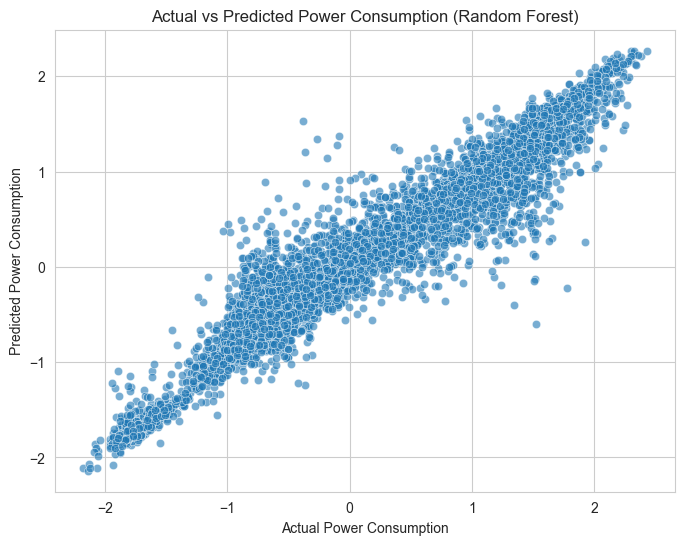

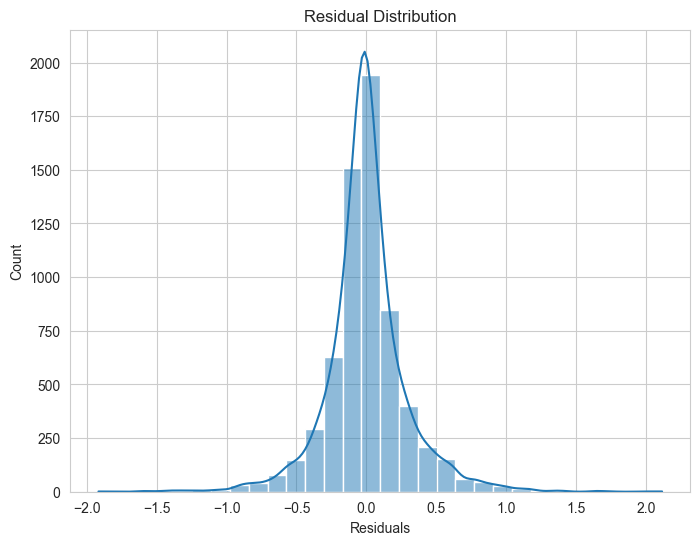

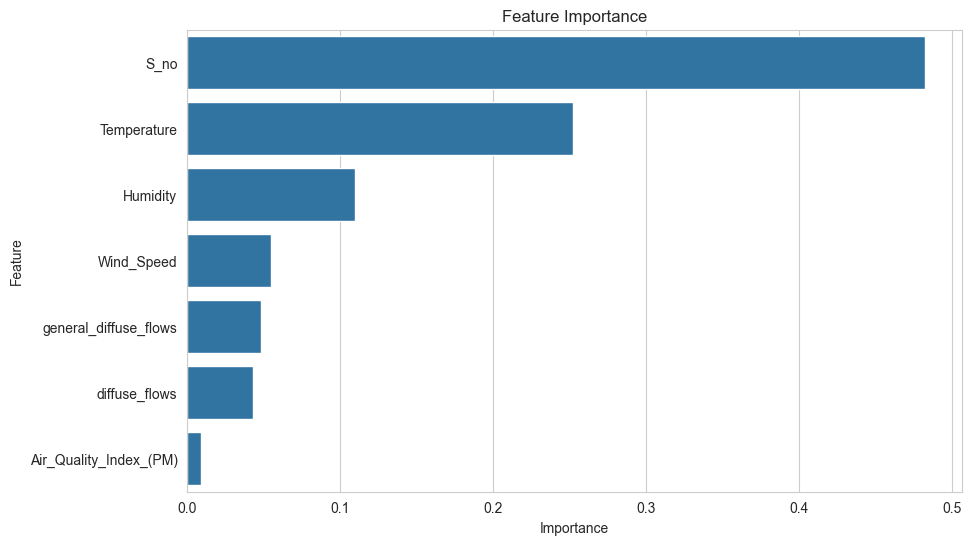

In [39]:
# Select the best model (based on R² score from Step 4)
best_model_name = results_df['R2 Score'].idxmax()
best_model = models[best_model_name]

# Make predictions
y_pred = best_model.predict(X_test)

# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Power Consumption")
plt.ylabel("Predicted Power Consumption")
plt.title(f"Actual vs Predicted Power Consumption ({best_model_name})")
plt.show()

# Residual Plot (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

# Feature Importance (for tree-based models)
if best_model_name in ["Decision Tree", "Random Forest", "Gradient Boosting"]:
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title("Feature Importance")
    plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict & Evaluate again
y_pred_best = best_rf.predict(X_test)

# Compute new metrics
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best ** 0.5
r2_best = r2_score(y_test, y_pred_best)

print(f"After Tuning -> MAE: {mae_best}, MSE: {mse_best}, RMSE: {rmse_best}, R² Score: {r2_best}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
After Tuning -> MAE: 0.19287576217099164, MSE: 0.08384406269682236, RMSE: 0.28955839255117843, R² Score: 0.9173632548881798


In [41]:
print("🔹 Final Model Evaluation 🔹")
print(f"Best Model: Random Forest Regressor")
print(f"Best Hyperparameters: {best_params}")
print("\nPerformance Metrics:")
print(f"🔹 Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"🔹 Mean Squared Error (MSE): {mse_best:.4f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse_best:.4f}")
print(f"🔹 R² Score: {r2_best:.4f}")

if r2_best > 0.90:
    print("\n✅ The model performs well, explaining over 90% of the variance in power consumption!")
else:
    print("\n⚠️ The model could be improved further with feature engineering or additional data.")

🔹 Final Model Evaluation 🔹
Best Model: Random Forest Regressor
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Performance Metrics:
🔹 Mean Absolute Error (MAE): 0.1929
🔹 Mean Squared Error (MSE): 0.0838
🔹 Root Mean Squared Error (RMSE): 0.2896
🔹 R² Score: 0.9174

✅ The model performs well, explaining over 90% of the variance in power consumption!
